# Exercise Week 2
- Dave Schurtenberger
- Luca Kyburz
- Pascal Gansner
- Sofia Horlacher

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL, MSTL

from utils import get_figure, time_plot, moving_average_smoothing
from data import get_electrocardiogram, get_switzerland_temperature, get_mauna_loa_co2, get_random_walk

c:\Users\kybur\Repos\HSLU\time\notebooks\data.py:12: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


## 1. Synthetic Time Series with Known Components

In [2]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

### Time Series 1

In [3]:
seed = 42

n = 200

drift = 0.5
variance = 9

period = 10
amp = 10

seasonal = amp * np.sin(2 * np.pi * np.arange(n) / period)

series = get_random_walk(seed, n, variance=variance, drift=drift, seasonal=seasonal)


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kybur\AppData\Local\Temp\ipykernel_60384\533450603.py:5: SyntaxWarning: invalid escape sequence '\s'
  label=f'$\sigma^2 = {variance}$, A = {amp}, P = {period}, seed = {seed}',


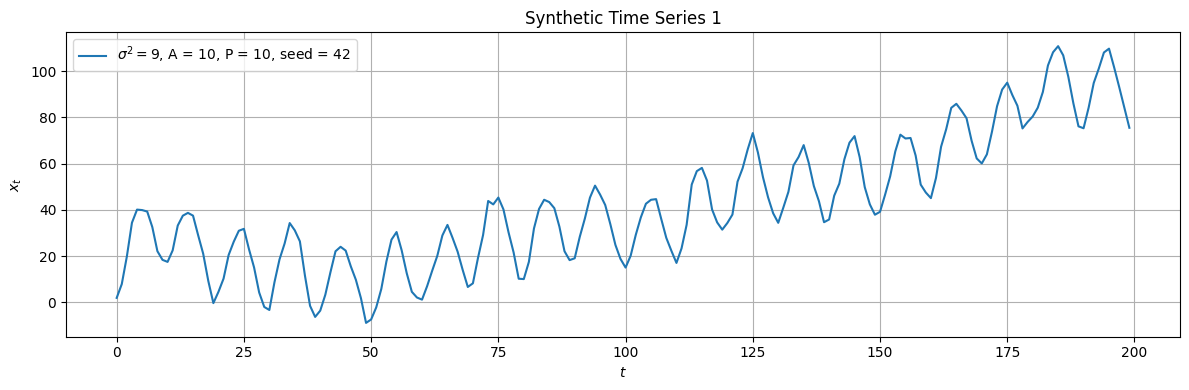

In [4]:
fig, [ax] = get_figure()
time_plot(
    x=np.arange(n),
    y=series, 
    label=f'$\sigma^2 = {variance}$, A = {amp}, P = {period}, seed = {seed}',
    title='Synthetic Time Series 1',
    ax=ax
)
fig.tight_layout()

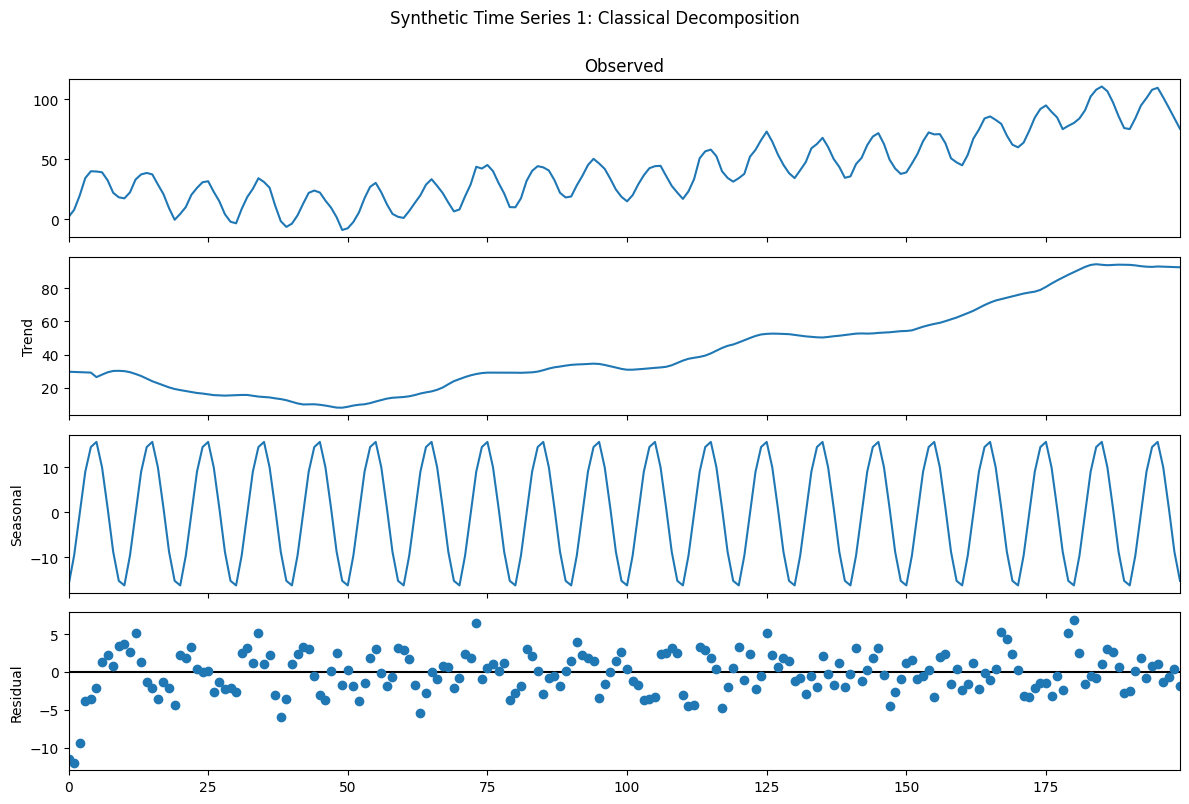

In [5]:
decomposed = seasonal_decompose(series, extrapolate_trend='freq', period=10)
fig = decomposed.plot()
fig.set_size_inches(12, 8)
fig.suptitle("Synthetic Time Series 1: Classical Decomposition", y=1)
fig.tight_layout()

In [6]:
mse = mean_squared_error(series, decomposed.trend + decomposed.seasonal)
print("MSE:", mse)

MSE: 7.802152087123114


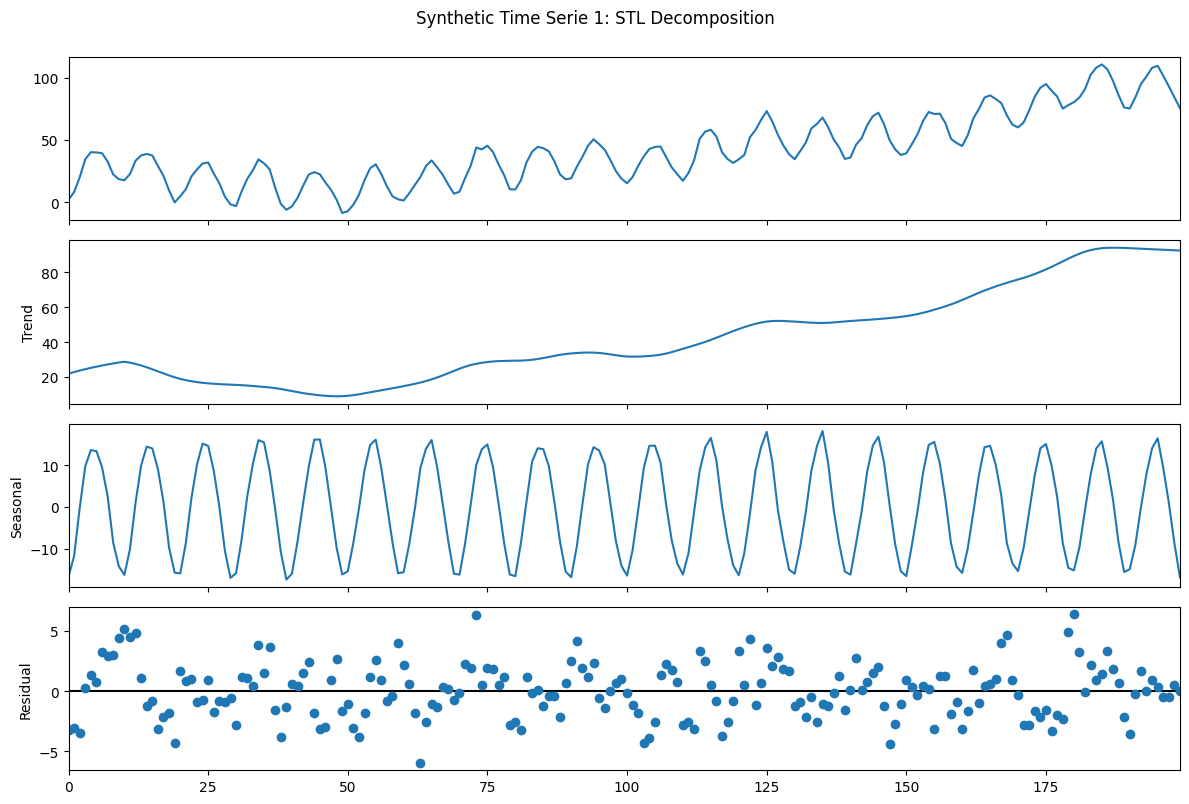

In [7]:
decomposed = STL(series, period=10).fit()
fig = decomposed.plot()
fig.axes[0].set_title("")
fig.set_size_inches(12, 8)
fig.suptitle("Synthetic Time Serie 1: STL Decomposition", y=1)
fig.tight_layout()

In [8]:
mse = mean_squared_error(series, decomposed.trend + decomposed.seasonal)
print("MSE:", mse)

MSE: 5.138390108286898


### Time Series 2

In [9]:
seed = 42

n = 200

drift = np.concatenate([np.arange(n // 2) * 0.1, (n // 2 - np.arange(n // 2)) * -0.1])
variance = 13

period = 15
amp = 20

seasonal = amp * np.sin(2 * np.pi * np.arange(n) / period)

series = get_random_walk(seed, n, variance=variance, drift=drift, seasonal=seasonal)


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kybur\AppData\Local\Temp\ipykernel_60384\2960094785.py:5: SyntaxWarning: invalid escape sequence '\s'
  label=f'$\sigma^2 = {variance}$, A = {amp}, P = {period}, seed = {seed}',


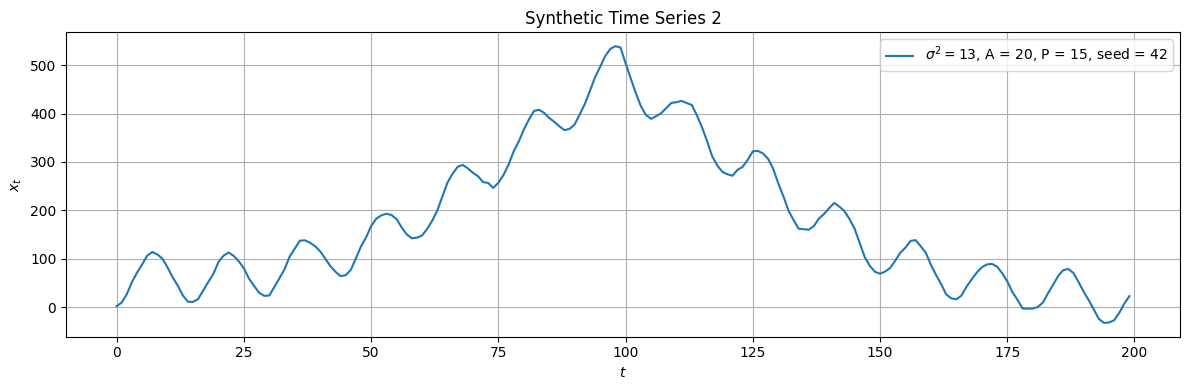

In [10]:
fig, [ax] = get_figure()
time_plot(
    x=np.arange(n),
    y=series, 
    label=f'$\sigma^2 = {variance}$, A = {amp}, P = {period}, seed = {seed}',
    title='Synthetic Time Series 2',
    ax=ax
)
fig.tight_layout()

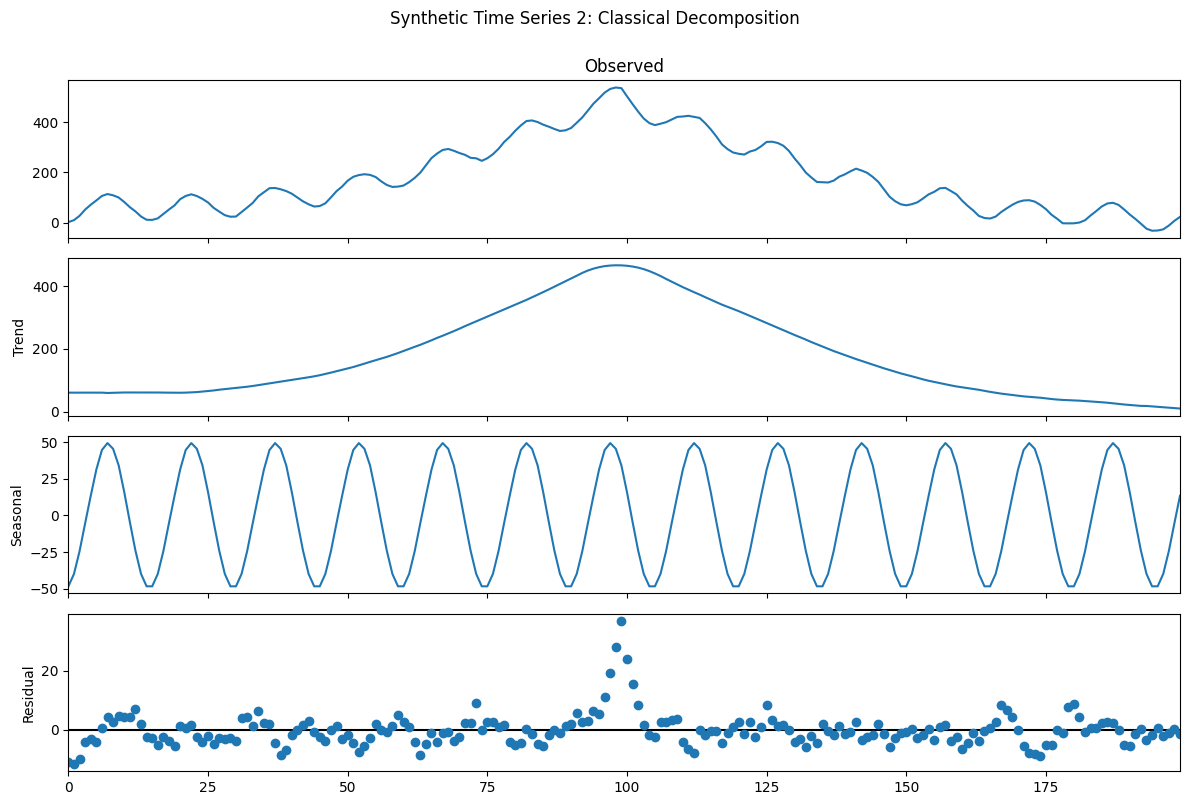

In [11]:
decomposed = seasonal_decompose(series, extrapolate_trend='freq', period=15)
fig = decomposed.plot()
fig.set_size_inches(12, 8)
fig.suptitle("Synthetic Time Series 2: Classical Decomposition", y=1)
fig.tight_layout()

In [12]:
mse = mean_squared_error(series, decomposed.trend + decomposed.seasonal)
print("MSE:", mse)

MSE: 32.726184627635455


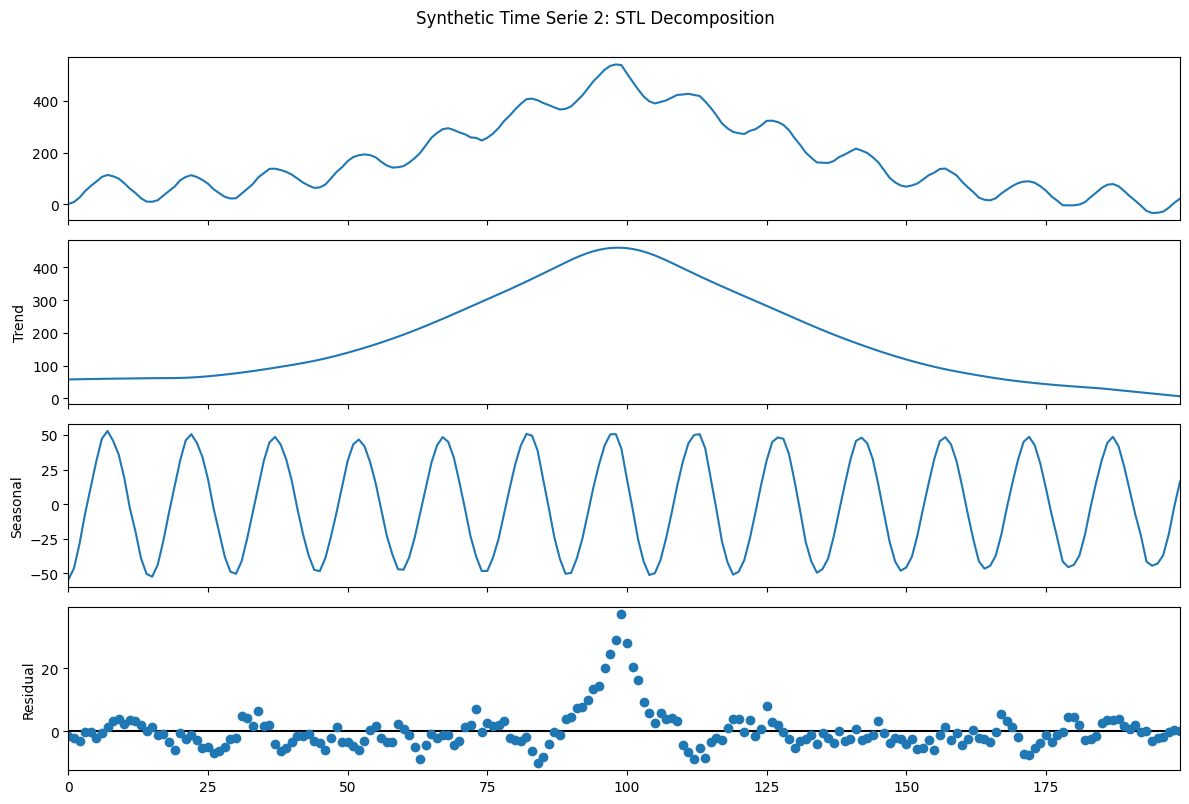

In [13]:
decomposed = STL(series, period=15).fit()
fig = decomposed.plot()
fig.axes[0].set_title("")
fig.set_size_inches(12, 8)
fig.suptitle("Synthetic Time Serie 2: STL Decomposition", y=1)
fig.tight_layout()

In [14]:
mse = mean_squared_error(series, decomposed.trend + decomposed.seasonal)
print("MSE:", mse)

MSE: 38.84283681702461


### Time Series 3

In [15]:
seed = 42

n = 200

drift = 0.5
variance = 9

period = 5
amp = 10

seasonal = amp * np.sin(10 * np.pi * np.arange(n) / period)

series = get_random_walk(seed, n, variance=variance, drift=drift, seasonal=seasonal)


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kybur\AppData\Local\Temp\ipykernel_60384\1312941356.py:5: SyntaxWarning: invalid escape sequence '\s'
  label=f'$\sigma^2 = {variance}$, A = {amp}, P = {period}, seed = {seed}',


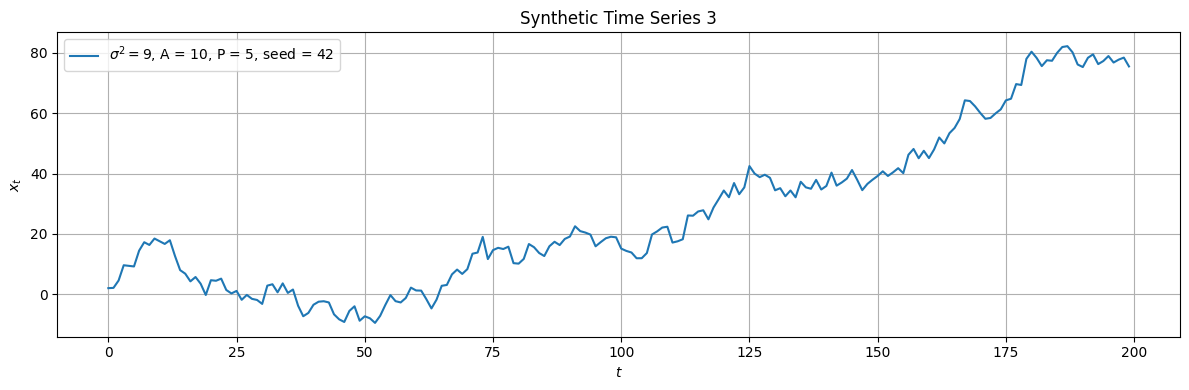

In [16]:
fig, [ax] = get_figure()
time_plot(
    x=np.arange(n),
    y=series, 
    label=f'$\sigma^2 = {variance}$, A = {amp}, P = {period}, seed = {seed}',
    title='Synthetic Time Series 3',
    ax=ax
)
fig.tight_layout()

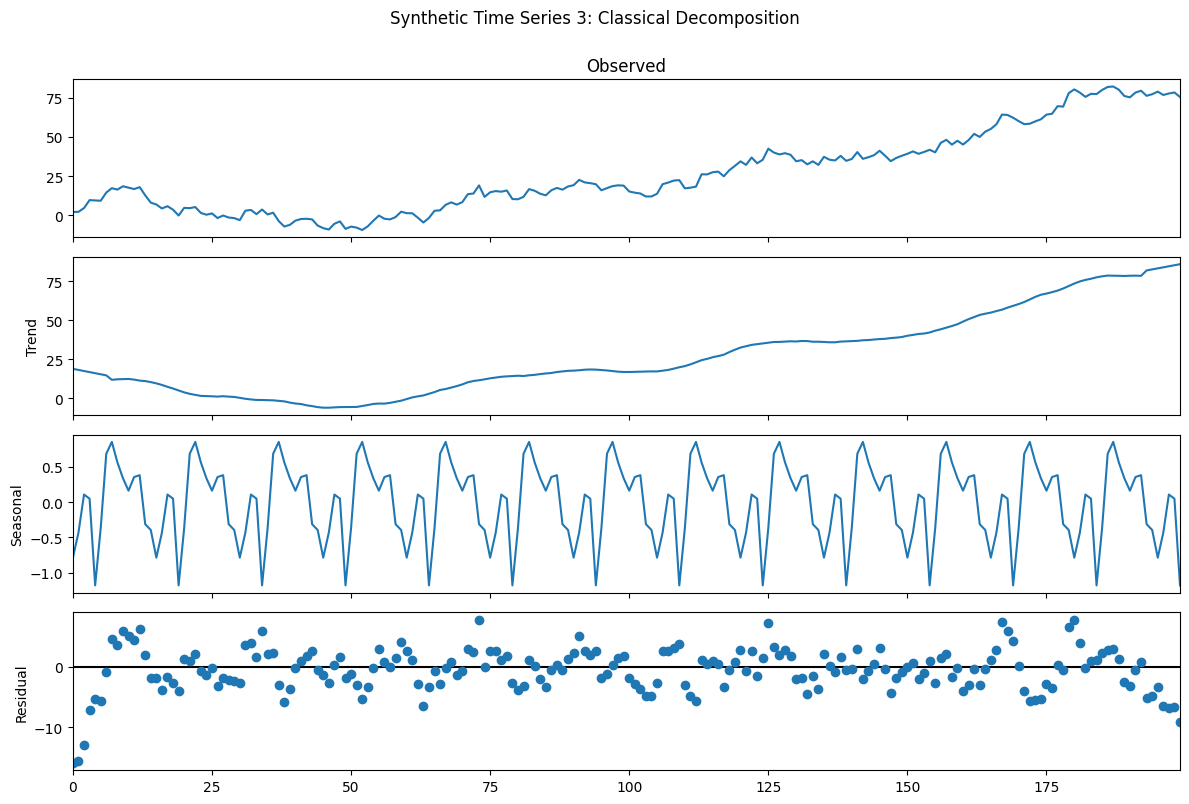

In [17]:
decomposed = seasonal_decompose(series, extrapolate_trend='freq', period=15)
fig = decomposed.plot()
fig.set_size_inches(12, 8)
fig.suptitle("Synthetic Time Series 3: Classical Decomposition", y=1)
fig.tight_layout()

In [18]:
mse = mean_squared_error(series, decomposed.trend + decomposed.seasonal)
print("MSE:", mse)

MSE: 13.456654719837138


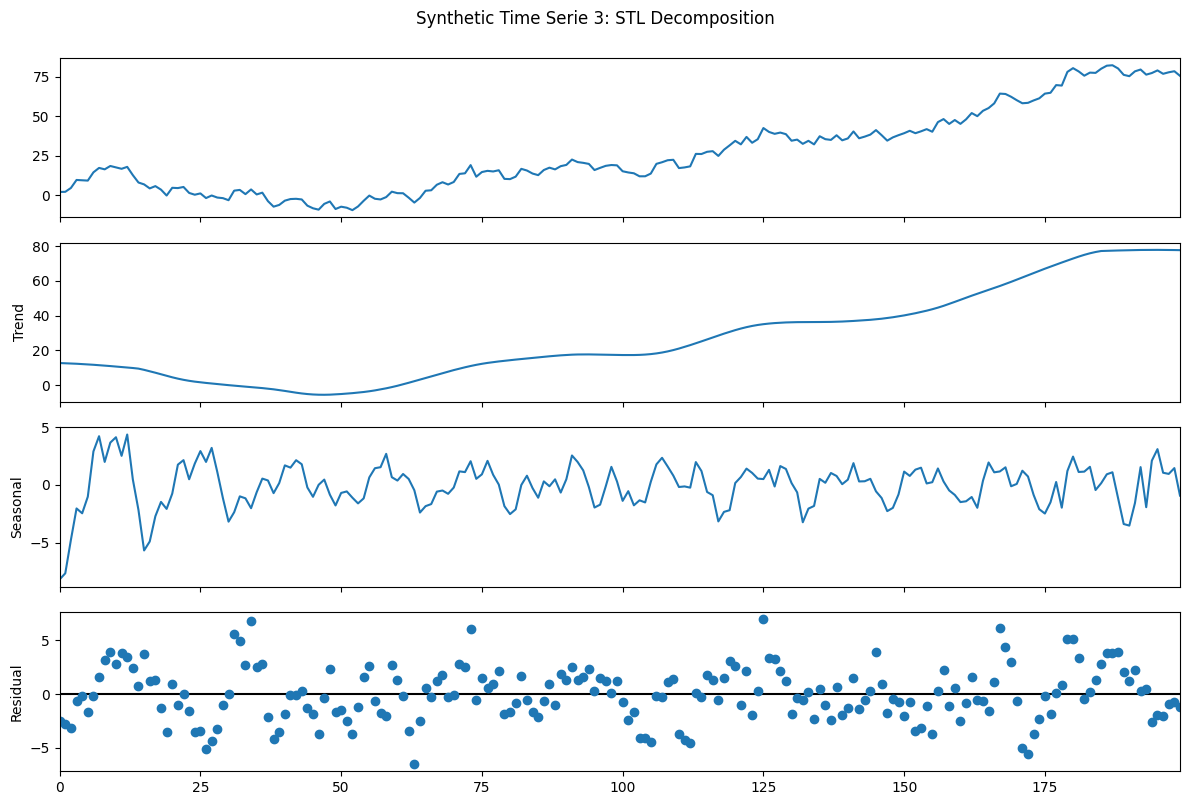

In [19]:
decomposed = STL(series, period=15).fit()
fig = decomposed.plot()
fig.axes[0].set_title("")
fig.set_size_inches(12, 8)
fig.suptitle("Synthetic Time Serie 3: STL Decomposition", y=1)
fig.tight_layout()

In [20]:
mse = mean_squared_error(series, decomposed.trend + decomposed.seasonal)
print("MSE:", mse)

MSE: 6.2143214365317885


## 2. Extend Lecture 1 Exercise with ACF Plots & Time Series Decomposition

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path
from itertools import cycle

In [22]:
def classical_decomposition(series, periods):
    mean_squared_errors = []
    decompositions = []
    for period in periods:
        decomposed = seasonal_decompose(series, period=period)
        mean_squared_errors.append(mean_squared_error(series, decomposed.trend + decomposed.seasonal))
        decompositions.append(decomposed)

    best_index = np.argmin(mean_squared_errors)
    best_period = periods[best_index]

    print("Best period:", best_period)
    print("MSE:", np.min(mean_squared_errors))
    print("Periods:", periods)
    print("MSEs:", mean_squared_errors)

    return decompositions[best_index]


def stl_decomposition(series, periods):
    mean_squared_errors = []
    decompositions = []
    for period in periods:
        decomposed = STL(series, period=period).fit()
        mean_squared_errors.append(mean_squared_error(series, decomposed.trend + decomposed.seasonal))
        decompositions.append(decomposed)

    best_index = np.argmin(mean_squared_errors)
    best_period = periods[best_index]

    print("Best period:", best_period)
    print("MSE:", np.min(mean_squared_errors))
    print("Periods:", periods)
    print("MSEs:", mean_squared_errors)

    return decompositions[best_index]


def plot_acf(index, series, name, lags=40):
    fig, axes = get_figure(nrows=1, ncols=2, figsize=(14, 5))
    axes[0].plot(index, series)
    axes[0].set_title(f'{name}')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Value')
    axes[0].grid(True, alpha=0.3)

    sm.graphics.tsa.plot_acf(series, lags=lags, ax=axes[1])
    axes[1].set_title(f'ACF: {name}')
    axes[1].grid(True, alpha=0.3)

### 2.1.Pandas Refresher (ISE)

In [23]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx", skiprows=1)
df.set_index("date", inplace=True)

c:\Users\kybur\Repos\HSLU\time\.venv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


#### Classical Decomposition

Best period: 9
MSE: 0.00022161356471669632
Periods: [7, 9, 10, 12, 15]
MSEs: [0.0002246806800199233, 0.00022161356471669632, 0.0002237865042036387, 0.0002278983863106325, 0.0002388227671651511]


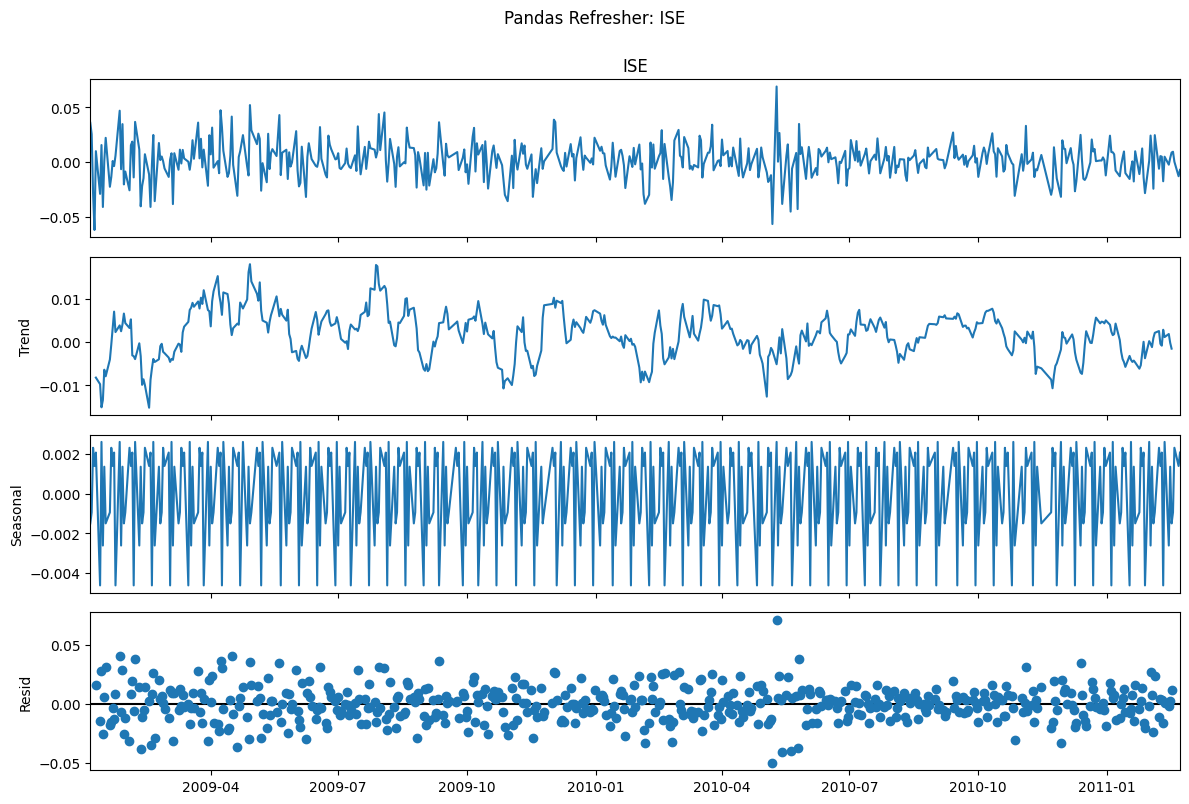

In [24]:
decomposed = classical_decomposition(df["ISE"], [7, 9, 10, 12, 15])
fig = decomposed.plot()
fig.set_size_inches(12, 8)
fig.suptitle("Pandas Refresher: ISE", y=1)
fig.tight_layout()

#### STL Decomposition

Best period: 9
MSE: 0.00022161356471669632
Periods: [7, 9, 10, 12, 15]
MSEs: [0.0002246806800199233, 0.00022161356471669632, 0.0002237865042036387, 0.0002278983863106325, 0.0002388227671651511]


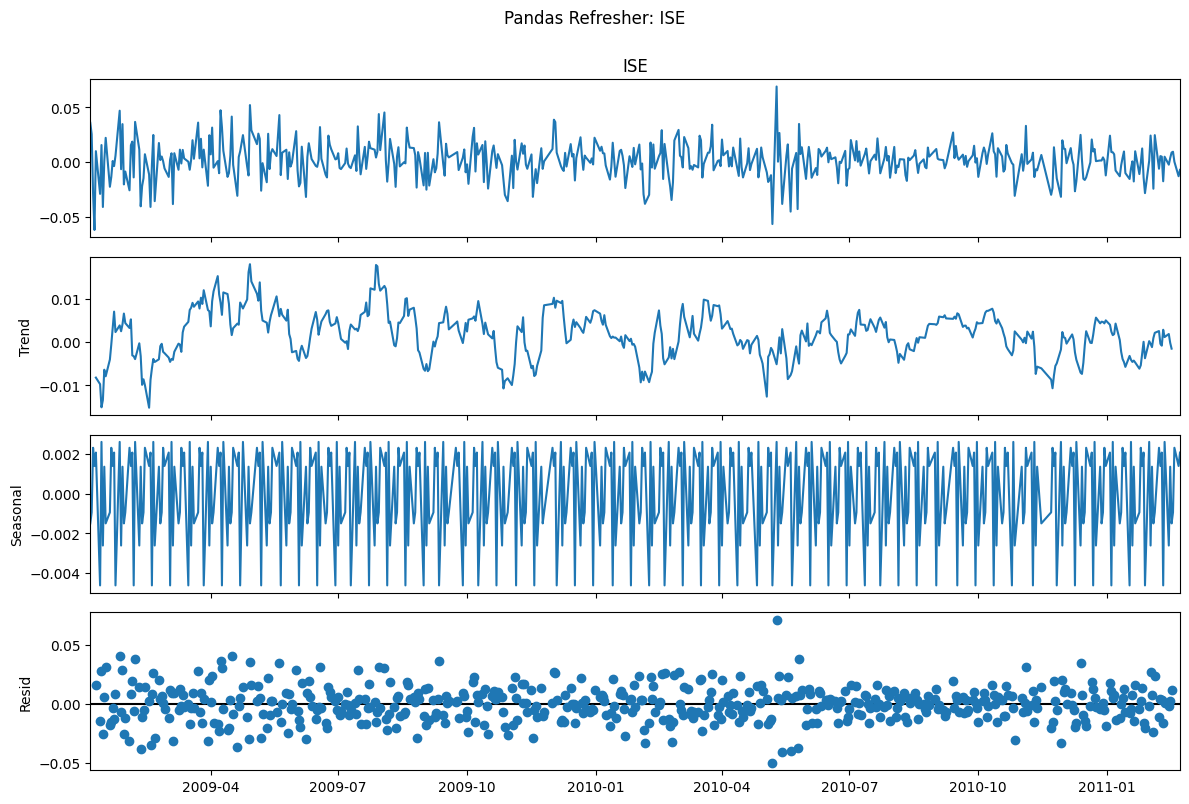

In [25]:
decomposed = classical_decomposition(df["ISE"], [7, 9, 10, 12, 15])
fig = decomposed.plot()
fig.set_size_inches(12, 8)
fig.suptitle("Pandas Refresher: ISE", y=1)
fig.tight_layout()

#### ACF Plot

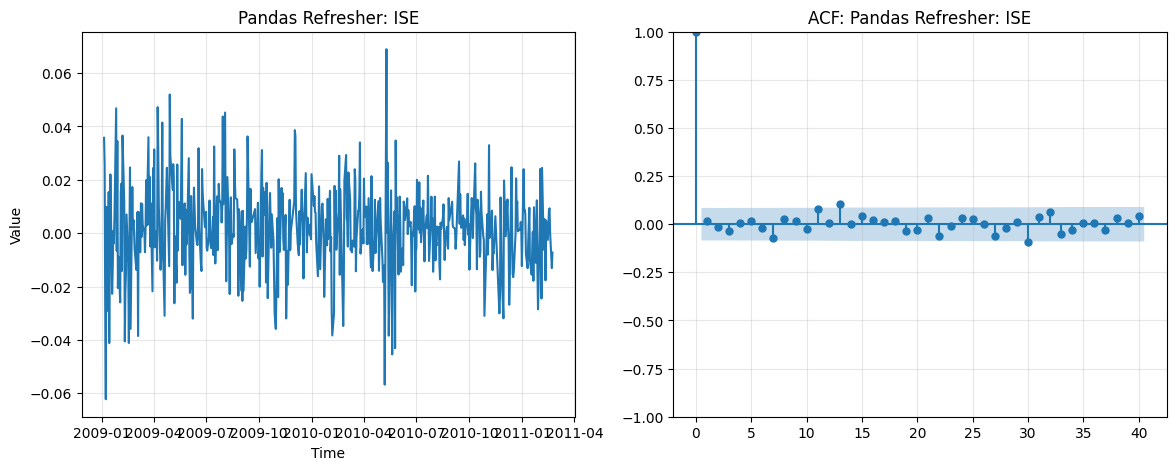

In [26]:
name = "Pandas Refresher: ISE"
plot_acf(df.index, df.ISE, name)

Neither classical decomposition nor STL descomposition couldn't extract a very clear trend or seasonality from the data, but given the original data that seems very difficult to approximate anyways. However the results of the STL decomposition are a lot smoother and also achieved a lower MSE, on the other hand the (erratic) seasonality extracted by the classical decomposition shows a more typical seasonal pattern, while the STL seasonality shows high variance and no clear seasons.

The ACF plot resembles that of white noise (correlation of 1 only at lag 0) a lot which explains why it is so difficult to extract meaningful components from the data.

### 2.2. Pandas Refresher (PM2_5_1_HR)

In [27]:
df = pd.read_csv("01_Exercise/data/94a5-zqnn.csv", sep=",")
#Selecting one location and pm2.5
df = df.loc[df.name=="Monash", ['datetime', 'pm2_5_1_hr']]
df.datetime = pd.to_datetime(df.datetime)
df.sort_values("datetime", inplace=True)
df.set_index("datetime", inplace=True)
df.dropna(inplace=True)
df["pm2_5_1_hr"] = df["pm2_5_1_hr"].astype(str).str.replace(",", "").astype(float)

C:\Users\kybur\AppData\Local\Temp\ipykernel_60384\2056474913.py:1: DtypeWarning: Columns (8,9,10,11,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("01_Exercise/data/94a5-zqnn.csv", sep=",")
C:\Users\kybur\AppData\Local\Temp\ipykernel_60384\2056474913.py:4: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.datetime = pd.to_datetime(df.datetime)


In [28]:
# Use just an extract for visibility
df = df.iloc[:600]

#### Classical Decomposition

Best period: 5
MSE: 14.390335979887084
Periods: [5, 7, 9, 10, 12, 15]
MSEs: [14.390335979887084, 23.34904282583365, 34.38357495275402, 41.80903851795462, 49.137932521816474, 80.13276729848715]


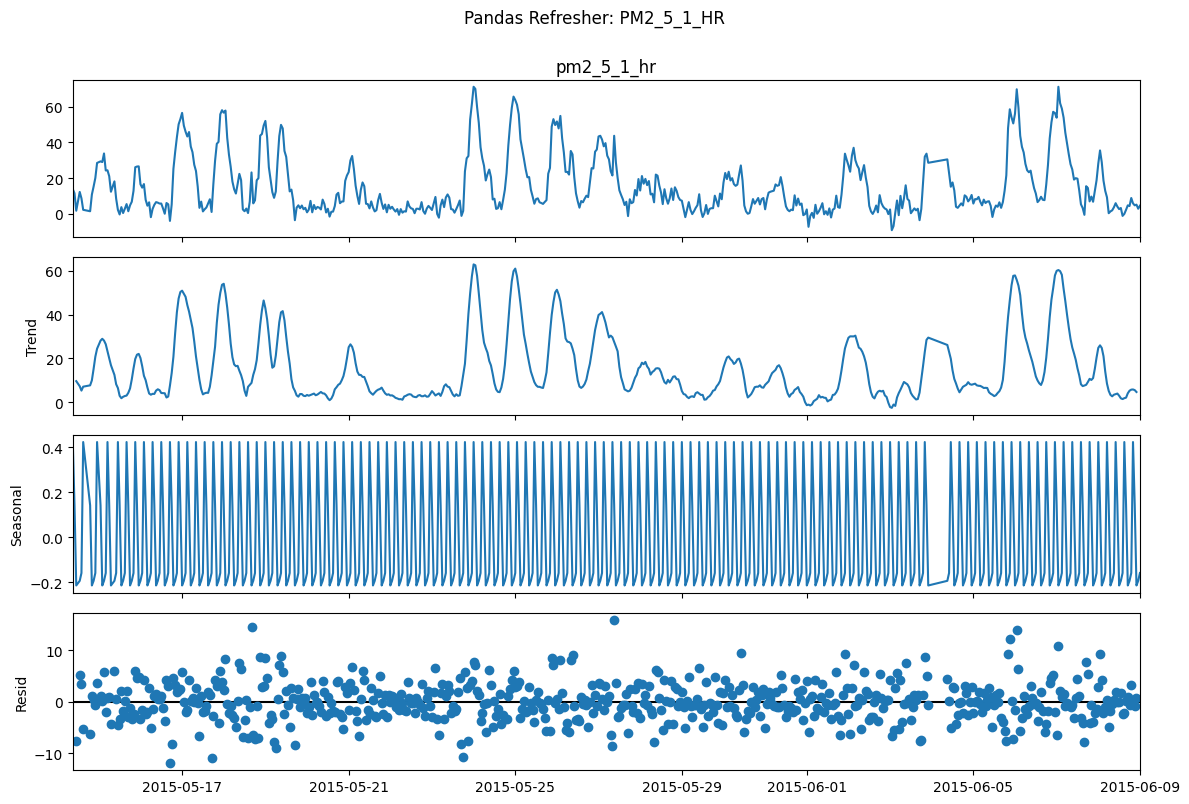

In [29]:
decomposed = classical_decomposition(df["pm2_5_1_hr"], [5, 7, 9, 10, 12, 15])
fig = decomposed.plot()
fig.set_size_inches(12, 8)
fig.suptitle("Pandas Refresher: PM2_5_1_HR", y=1)
fig.tight_layout()


#### STL Decomposition

Best period: 5
MSE: 13.959015607521662
Periods: [5, 7, 9, 10, 12, 15]
MSEs: [13.959015607521662, 24.99606308458932, 37.454745644916365, 40.73362559672268, 43.85234639861855, 81.11127337008004]


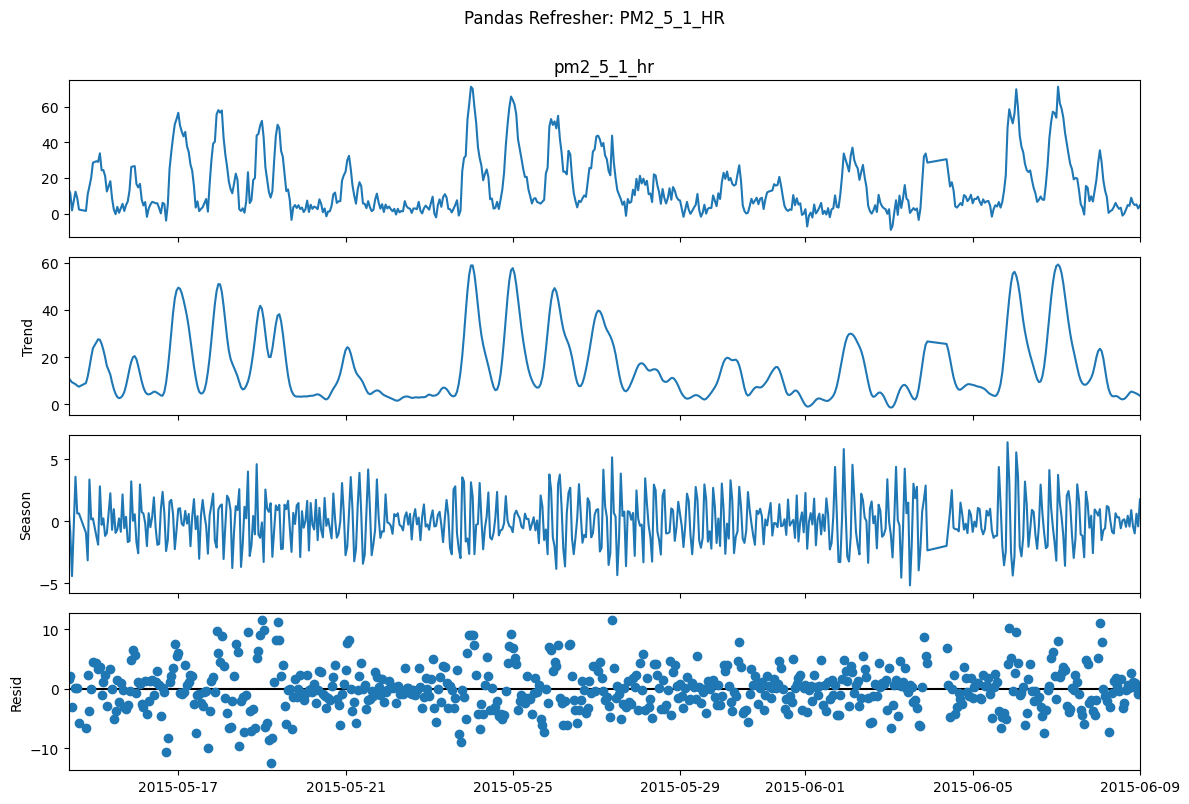

In [30]:
decomposed = stl_decomposition(df["pm2_5_1_hr"], [5, 7, 9, 10, 12, 15])
fig = decomposed.plot()
fig.set_size_inches(12, 8)
fig.suptitle("Pandas Refresher: PM2_5_1_HR", y=1)
fig.tight_layout()


#### ACF Plot

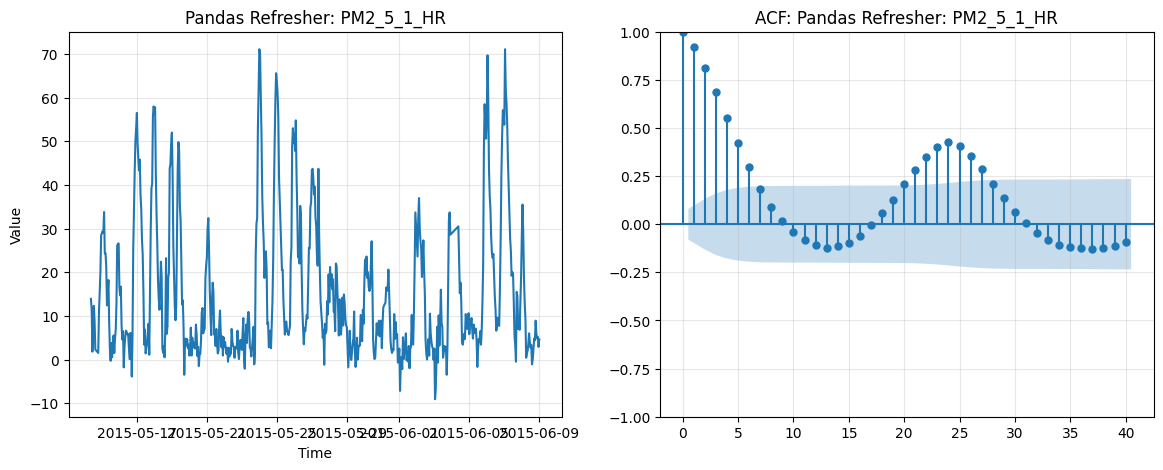

In [31]:
name = "Pandas Refresher: PM2_5_1_HR"
plot_acf(df.index, df.pm2_5_1_hr, name)

Both types of decomposition are very similar to the first example from exercise one, where no clear trend is extracted and a rather erratic seasonal component is extracted. The STL decomposition however was able to extract a pretty decent seasonal component, you can clearly see that while it is erratic, the spikes still show a seasonality. Overall it looks likea random walk with a seasonal component, according to the ACF plot, which clearly shows that there is some time dependence in the data.

### 2.3. Handling Missing Data (Energy Consumption)

In [32]:
from data import compact_to_expanded

block_df = pd.read_parquet("01_Exercise/data/london_smart_meters/preprocessed/london_smart_meters_merged_block_0-7.parquet")
exp_block_df = compact_to_expanded(block_df[block_df.file=="block_7"], timeseries_col = 'energy_consumption', static_cols = [], time_varying_cols = [], ts_identifier = "LCLid")

100%|██████████| 50/50 [00:00<00:00, 1008.07it/s]


In [33]:
# Use the same data as in the notebook from exercise 1
df = exp_block_df[exp_block_df.LCLid=="MAC000193"].set_index("timestamp")
df.fillna(method="ffill", inplace=True)

C:\Users\kybur\AppData\Local\Temp\ipykernel_60384\1732405275.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [34]:
# Analyze a short window of days for visibility
window =  slice("2012-10-06", "2012-10-10")
df = df[window]

#### Classical Decomposition

Best period: 48
MSE: 0.03897679999972274
Periods: [12, 24, 48]
MSEs: [0.04885996634774603, 0.05208869778555131, 0.03897679999972274]


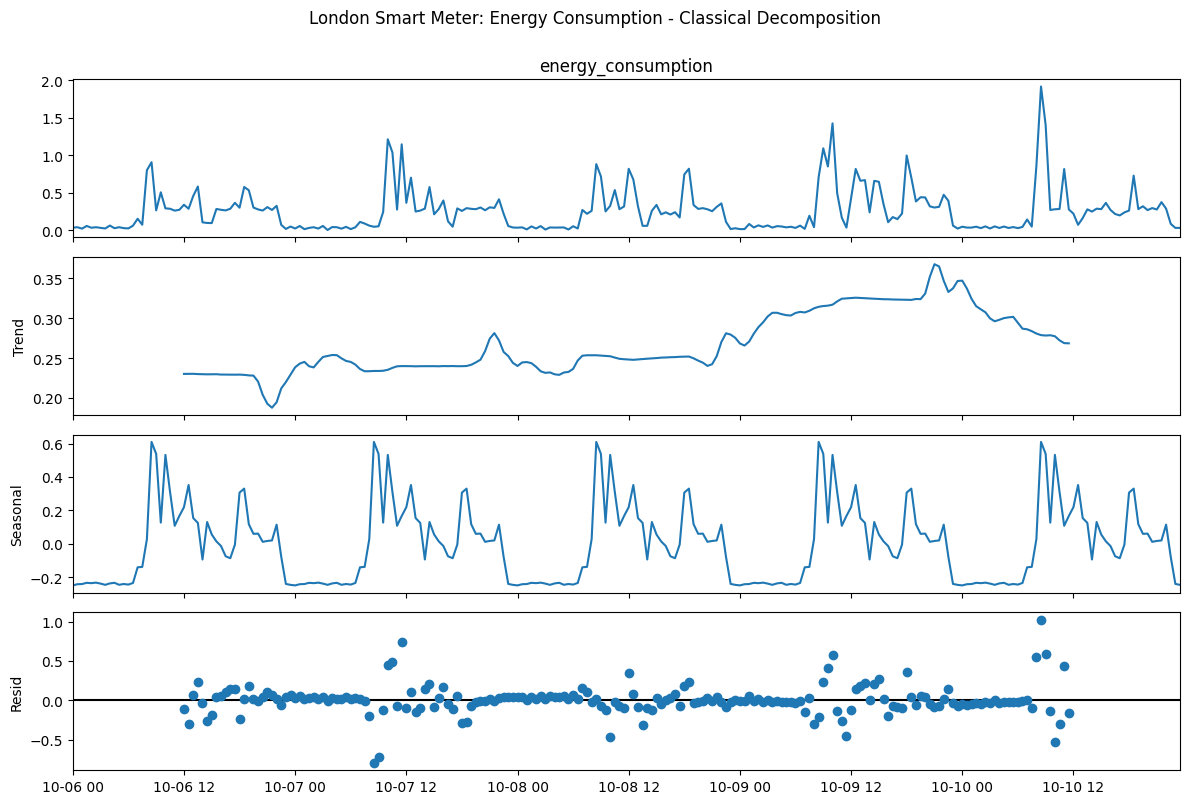

In [35]:
decomposed = classical_decomposition(df["energy_consumption"], [12, 24, 48])
fig = decomposed.plot()
fig.set_size_inches(12, 8)
fig.suptitle("London Smart Meter: Energy Consumption - Classical Decomposition", y=1)
fig.tight_layout()

#### STL Decomposition

Best period: 48
MSE: 0.02245210590878449
Periods: [12, 24, 48]
MSEs: [0.034934303505563404, 0.04047375056817337, 0.02245210590878449]


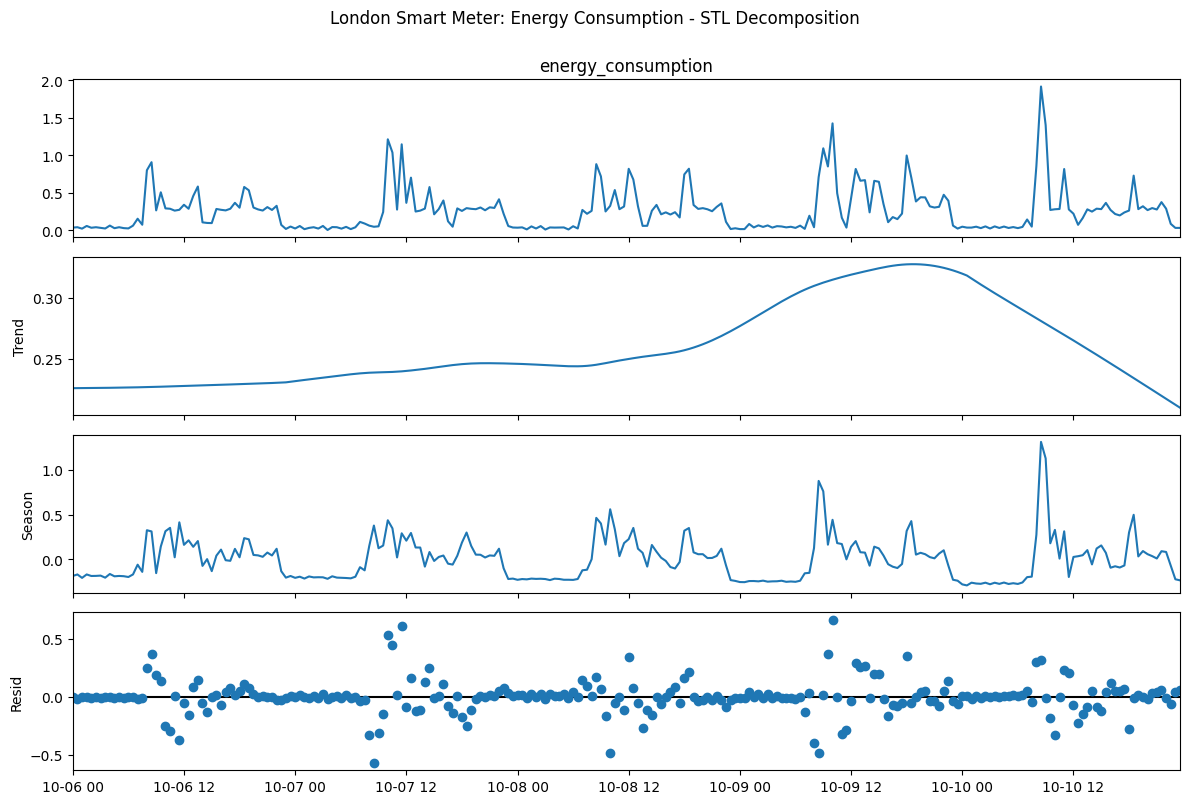

In [36]:
decomposed = stl_decomposition(df["energy_consumption"], [12, 24, 48])
fig = decomposed.plot()
fig.set_size_inches(12, 8)
fig.suptitle("London Smart Meter: Energy Consumption - STL Decomposition", y=1)
fig.tight_layout()

#### ACF Plot

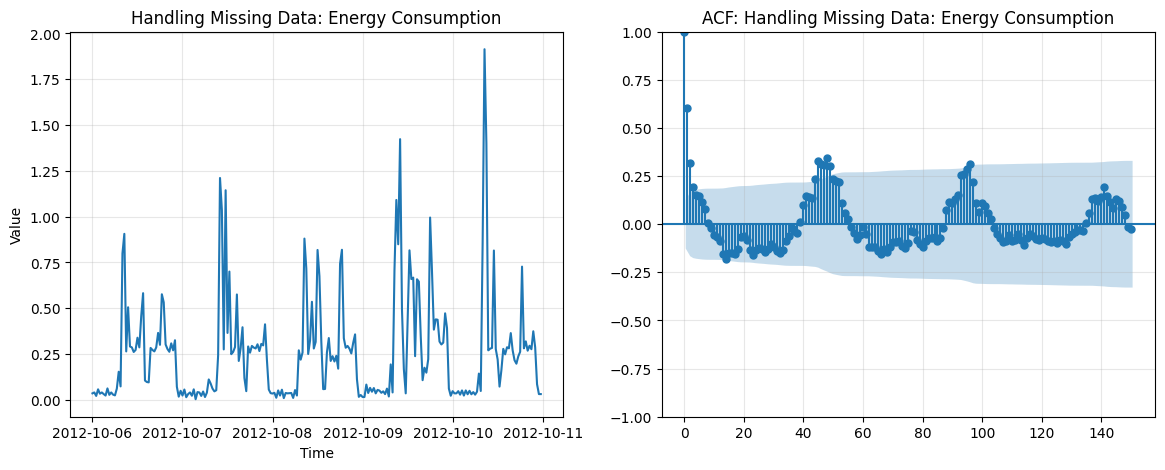

In [37]:
name = "Handling Missing Data: Energy Consumption"
plot_acf(df.index, df.energy_consumption, name, lags=150)

Both the classical decomposition and the STL decomposition captured the daily seasonality of the data very well. It clearly shows when people get up and start using electronic devices. You can also clearly see a spike in the seasonality during noon and evening, which can be explained by cooking and e.g. watching television or doing other leisure activities that require energy during that time.

The trend is also decomposited very well, while the trend component of the STL is a lot smoother. It seems like there is a general upwards trend in energy consumption, however the window looked at is too small to draw any real conclusions.

Interestingly the ACF plot does not show any high correlation apart when using small lags. However the seasonal pattern is clearly caught with it as well.

## 3. Re-implementation of Classical Decomposition

In [38]:
def seasonal_estimates(series: np.ndarray, period: int):
    means = np.zeros(period)
    for i in range(period):
        grouped_seasonal = series[i::period]
        means[i] = np.mean(grouped_seasonal)

    means -= means.mean()
    seasonal_estimate = np.zeros_like(series)
    for i in range(period):
        seasonal_estimate[i::period] = means[i]

    return seasonal_estimate


def classical_decomposition_custom(data, period):
    """
    Reimplementation of classical decomposition, assuming an additive model.
    """
    series = data.copy()
    _, _, trend_estimate = moving_average_smoothing(series, window_size=period, mode="same")

    detrended_series = series - trend_estimate

    seasonal_estimate = seasonal_estimates(detrended_series, period)
    remainder = detrended_series - seasonal_estimate

    return {
        'observed': series,
        'trend': trend_estimate,
        'seasonal': seasonal_estimate,
        'resid': remainder
    }

Testing the implementation:

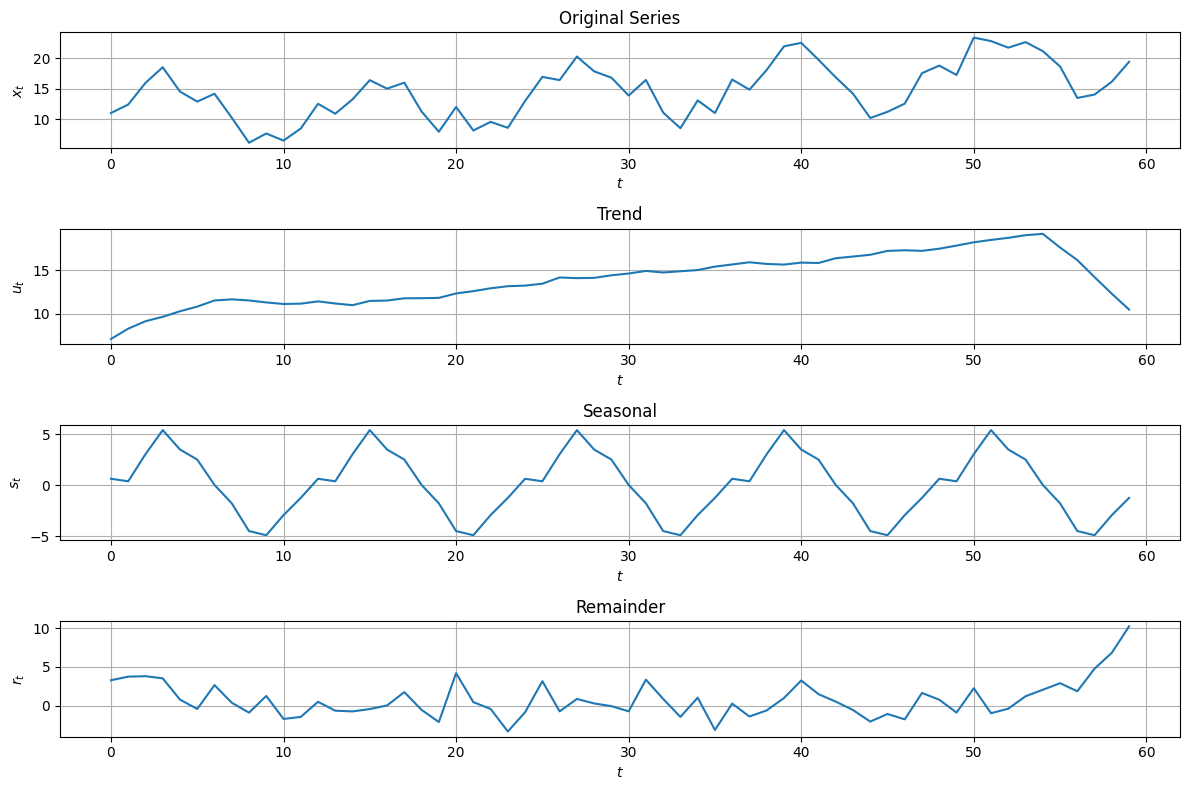

In [39]:
np.random.seed(42)
n_periods = 12
n_years = 5
n_steps = n_periods * n_years

trend = np.linspace(10, 20, n_steps)
seasonality = 5 * np.sin(2 * np.pi * np.arange(n_steps) / n_periods)
noise = np.random.normal(0, 2, n_steps)
signal = trend + seasonality + noise

result = classical_decomposition_custom(signal, n_periods)
fig, [ax1, ax2, ax3, ax4] = get_figure(4, 1, figsize=(12, 8))
time_plot(
    x=np.arange(len(result["observed"])),
    y=result["observed"],
    title='Original Series',
    ax=ax1
)
time_plot(
    x=np.arange(len(result["trend"])),
    y=result["trend"],
    title='Trend',
    ax=ax2,
    ylabel='$u_t$',
)
time_plot(
    x=np.arange(len(result["seasonal"])),
    y=result["seasonal"],
    title='Seasonal',
    ax=ax3,
    ylabel='$s_t$',
)
time_plot(
    x=np.arange(len(result["resid"])),
    y=result["resid"],
    title='Remainder',
    ax=ax4,
    ylabel='$r_t$',
)
fig.tight_layout()

## 4. ACF Plots for Different Random Walk Forms

In [40]:
seed = 45
n_steps = 200
variance = 1

rw_basic = get_random_walk(seed, n_steps, variance=variance)
rw_drift = get_random_walk(seed, n_steps, variance=variance, drift=2)
rw_seasonal = get_random_walk(seed, n_steps, variance=variance, seasonal=10 * np.sin(2 * np.pi * np.arange(n_steps) / 20))
rw_seasonal_drift = get_random_walk(seed, n_steps, variance=variance, drift=2, seasonal=10 * np.sin(2 * np.pi * np.arange(n_steps) / 20))

random_walks = {
    'Random Walk': rw_basic,
    'Random Walk with Drift': rw_drift, 
    'Seasonal Random Walk': rw_seasonal,
    'Seasonal Random Walk with Drift': rw_seasonal_drift
}

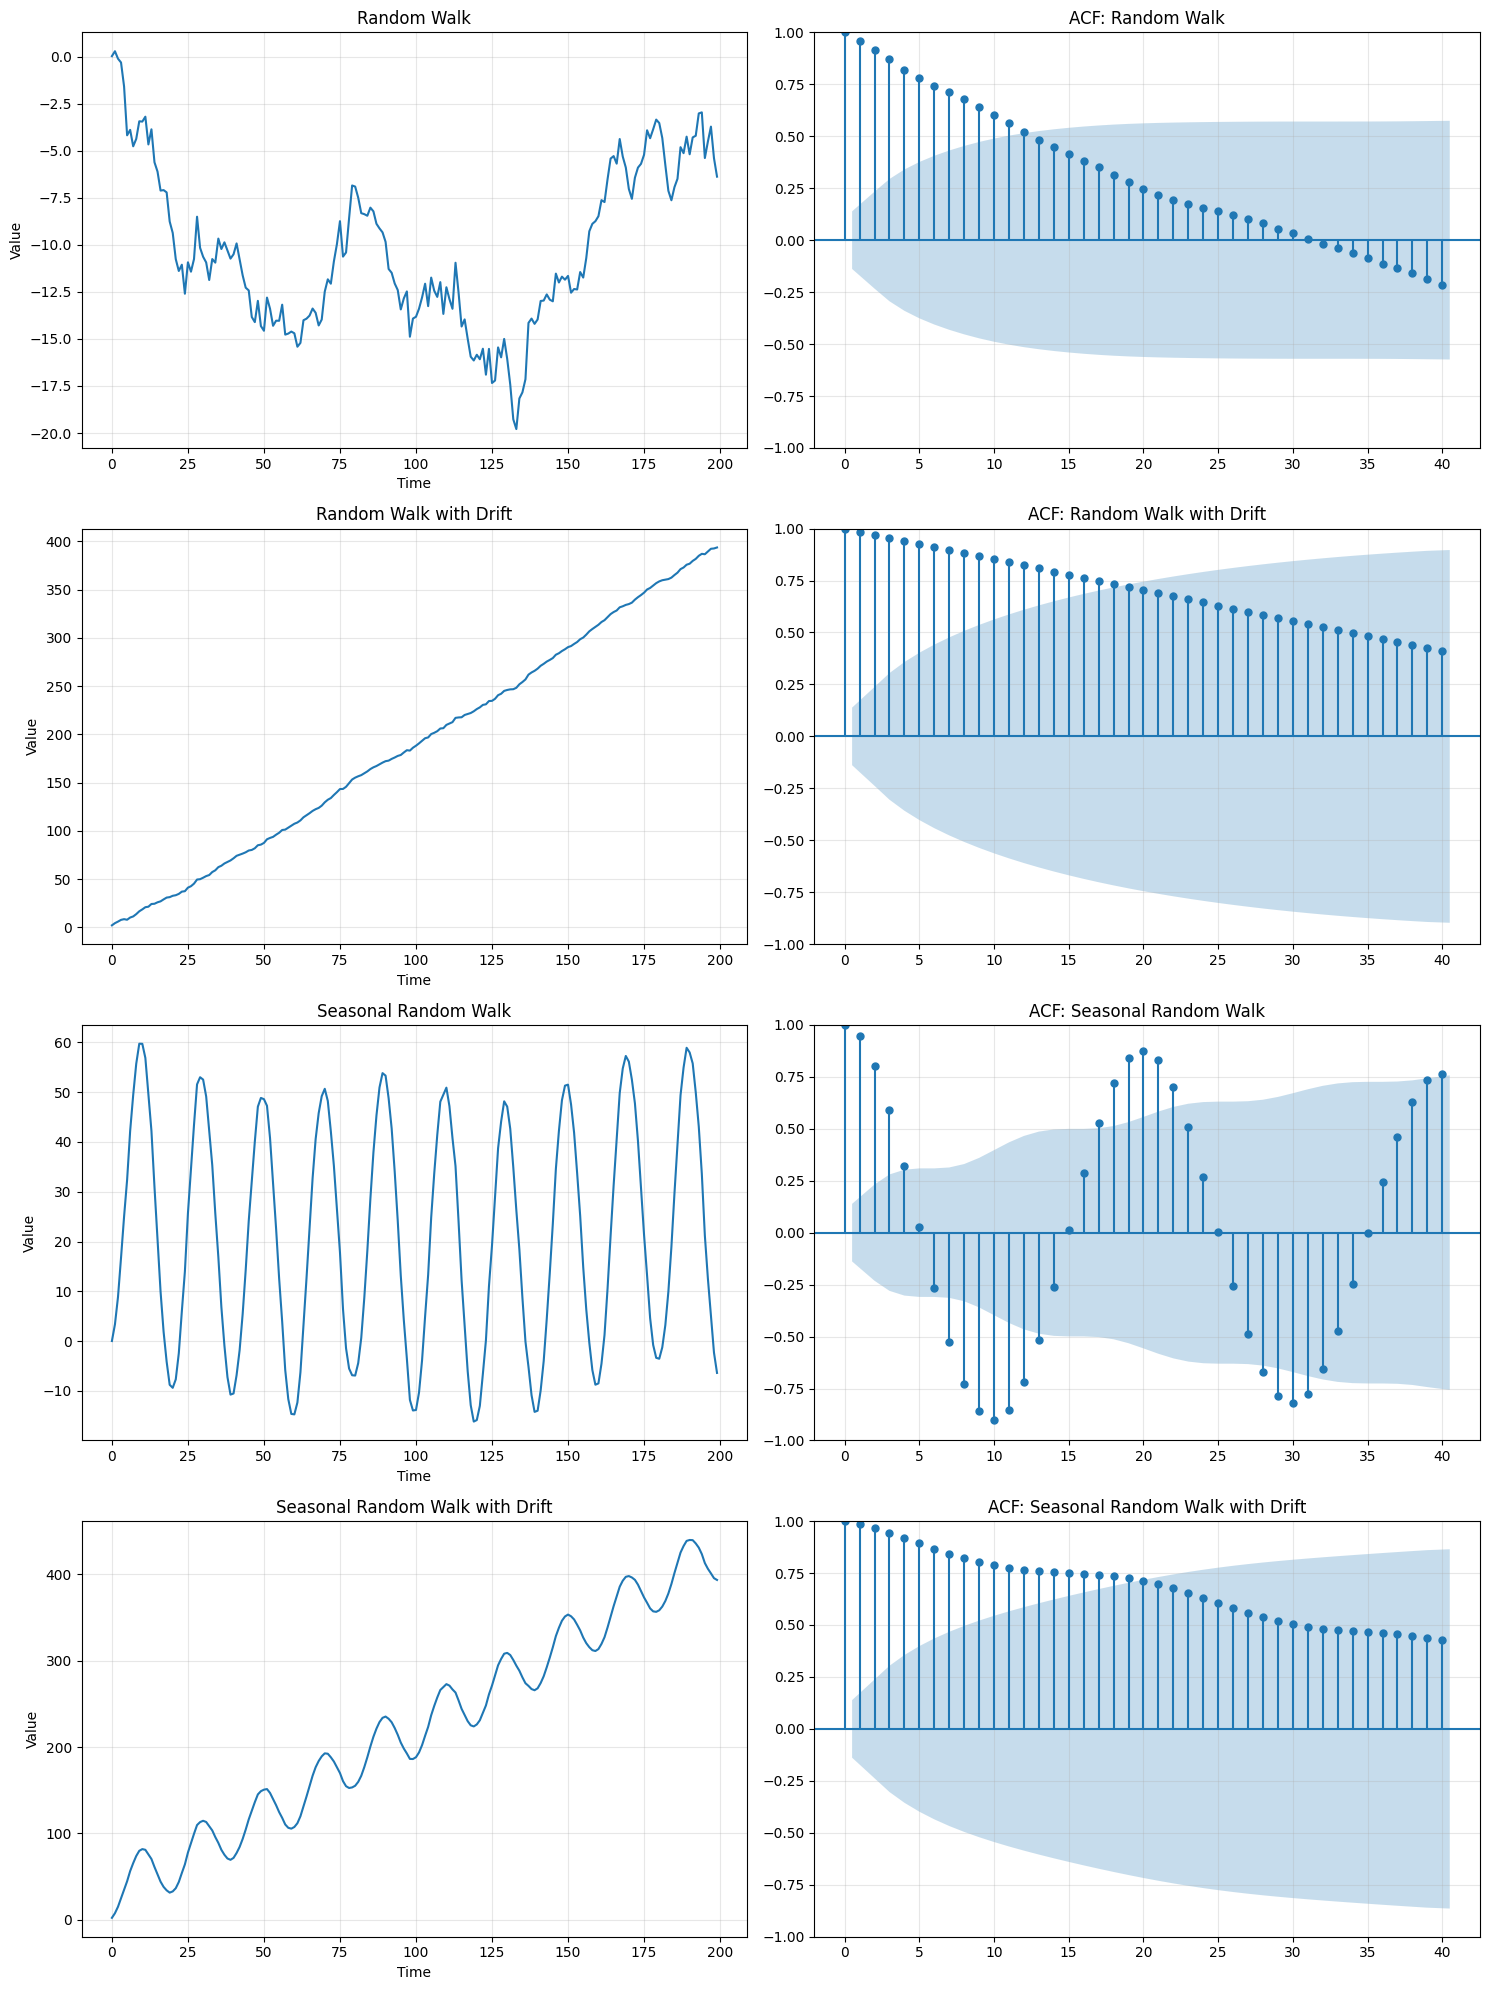

In [41]:
fig, axes = plt.subplots(len(random_walks), 2, figsize=(15, 20))
for i, (name, rw_data) in enumerate(random_walks.items()):
    axes[i, 0].plot(np.arange(n_steps), rw_data)
    axes[i, 0].set_title(f'{name}')
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('Value')
    axes[i, 0].grid(True, alpha=0.3)
    
    sm.graphics.tsa.plot_acf(rw_data, lags=40, ax=axes[i, 1])
    axes[i, 1].set_title(f'ACF: {name}')
    axes[i, 1].grid(True, alpha=0.3)

fig.tight_layout()

#### Interpretation
- **Random Walk**: The ACF shows a slow decay for increasing lags, which can be explained by the cumulative nature of a random walk. However again due to the cumulative nature, the correlation decreases over longer time periods and approaches zero.
- **Random Walk with Drift**: A similar pattern can be observed, except that the decrease in in correlation is a lot slower, because of the the drift component, that makes the differences introduced by noise less relevant and thus results in a higher correlation over the same lags as compared to the pure random walk.
- **Random Walk with Seasonal Component**: The ACF shows a clear seasonal pattern, with peaks at lags corresponding to the seasonal period. So in this example with peaks in correlation every 10 lags, alternating between positive and negative correlation. Over all the correlation closes in on zero, just very high lags: each seasonal peak (absolute) is lower than the previous one. This shows that it still is a random walk altough with some seasonality in it.
- **Random Walk with Drift and Seasonal Component**: In the ACF plot of this form of random walk, all the characteristics of the previous ones are combined. The correlation still appraoachs zero, due to the drift it approaches zero slowly and the seasonal pattern can be seen. However the peaks of the seasonal pattern are no longer clearly visible, they are more like plateaus and no longer go into negative correlation. This can be explained by the upwards and downwards movements within a season "cancelling" each other out. This can be seen in the following example of lag 10.

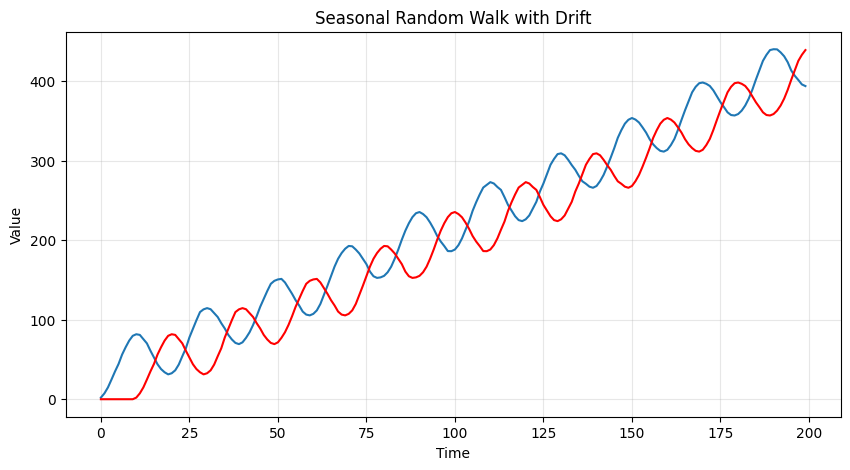

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(np.arange(n_steps), rw_seasonal_drift)
axes.set_title(f'{name}')
axes.set_xlabel('Time')
axes.set_ylabel('Value')
axes.grid(True, alpha=0.3)

shifted_rw_seasonal_drift = np.concatenate((np.zeros(10), rw_seasonal_drift[:-10]))
axes.plot(np.arange(n_steps), shifted_rw_seasonal_drift, "red")
axes.set_title(f'{name}')
axes.set_xlabel('Time')
axes.set_ylabel('Value')
axes.grid(True, alpha=0.3)